# <center> R1.04 Méthodes d'optimisation <br> TP1b - Descente de gradient 2D (et plus) </center>
<center> 2022/2023 - Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>

Le but de ce TP est d'implémenter quelques méthodes numériques d'optimisation, basées sur les méthodes de gradient, dans un espace $\mathbb{R}^n$ avec $n \geq 2$

In [2]:
import numpy as np


# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisation

%matplotlib inline


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

cmap_reversed = plt.cm.get_cmap('RdBu_r')


/tmp/ipykernel_4013/2445117881.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdBu_r')


## Échauffement : quelques dessins

La descente de gradient est un algorithme utilisable en toutes dimensions, cependant la partie intuition vient généralement des dimensions 1 et 2. 

On commence donc par quelques fonctions qui seront utiles pour visualiser des fonctions $f : \mathbb{R}^2 \to \mathbb{R}$.

L'exemple développé ici concerne la fonction f ci-dessous : 
$$f(x,y) = \frac{sin(x^2+y^2-x)}{\sqrt{x^2+y^2}+1}$$


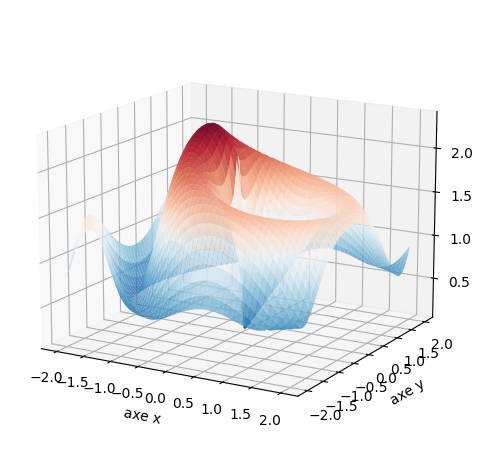

In [3]:
#dessin 2D -> 1D

n = 150


# linspace : "return evenly spaced numbers over a specified interval" 
# (ici : 150 nombres homogènement répartis entre -2 et 2)
VX = np.linspace(-2.0, 2.0, n) 
VY = np.linspace(-2.0, 2.0, n)

#meshgrid : renvoie des matrices de coordonnées qui, combinées, donnent 
#les coordonnées de tous les points constructibles à partir des vecteurs en paramètre
X,Y = np.meshgrid(VX, VY)

#Tester le plot avec un n = 10 au lieu de 150
#plt.plot(X,Y,'o',color = 'r')

def f(x,y):  
    r = np.sqrt(x**2+y**2)
    z = np.sin(r**2-x)/r+1
    return z


Z = f(X,Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
# Tweaking display region and labels
#ax.set_xlim(-3.0, 3.0)
#ax.set_ylim(-3.0, 3.0)
#ax.set_zlim(0, 4.0)
ax.set_xlabel('axe x')
ax.set_ylabel('axe y')
ax.set_zlabel('axe z')

#Point de vue en degrés (premier parametre : hauteur, deuxième : angle latéral)
ax.view_init(15, -60)

# surface (alpha : transparence -> 0 completement transparent)
# colormap : bas en bleu, haut en rouge
ax.plot_surface(X, Y, Z, alpha=0.8,cmap=cmap_reversed)


plt.tight_layout()
# plt.savefig('fonctions-niveau-1d.png')
plt.show()

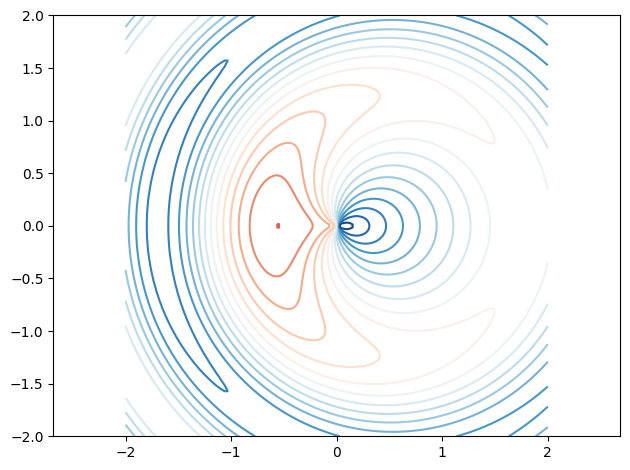

In [4]:
#courbes de niveau
# Contours et surface

#On affiche 20 niveaux différents entre 0 et 3
mes_niveaux = np.linspace(0,3,20)

# ligne de niveau dans le plan
fig = plt.figure()
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
#Plus les lignes sont rapprochées, plus la pente est forte
plt.contour(X, Y, Z,mes_niveaux,cmap=cmap_reversed)
plt.axis('equal') 

plt.tight_layout()
plt.show()

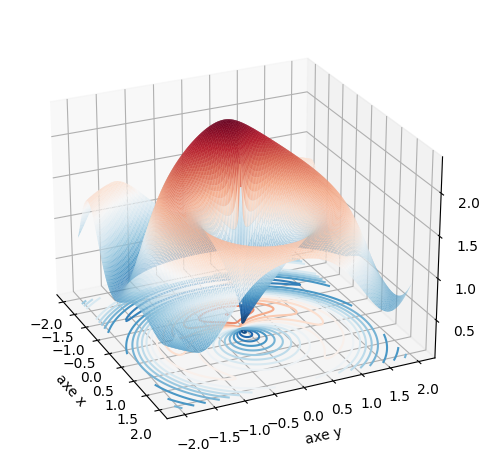

In [5]:
#surface + lignes de niveau

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('axe x')
ax.set_ylabel('axe y')
ax.set_zlabel('axe z')
ax.view_init(25, -25)

mes_niveaux = np.linspace(0,3,20)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none',alpha=0.9,cmap=cmap_reversed)
ax.contour(X, Y, Z, mes_niveaux, offset=0,cmap=cmap_reversed, linestyles="solid")

#ax.view_init(15, -60)
plt.tight_layout()
plt.show()

# Descente de gradient en deux dimensions


## Exercice 1 : Un exemple à fonction f fixée

Le but de cet exercice est d'implémenter la méthode (la plus basique) de descente de gradient, en 2D.


On va considérer la fonction $f: (x,y) \mapsto (x^2 +y -11)^2 + (x+y^2 -7)^2$


On rappelle l'étape clef du gradient :

$$a_{k+1} = a_k -  \delta \nabla f(a_k)$$



**Question 1**

1. Ecrire le corps de la fonction `f(x,y)`. 
2. Remarquez que l'on peut également la définir comme ne prenant qu'un seul paramètre $X$ définit à une liste de taille 2. Ecrire `f(X)`. Cette deuxième façon est plus facilement généralisable à $n$ dimensions. C'est cette syntaxe que nous privilégierons pour la suite.

In [6]:
def f(x,y):
    return ((x**2 + y - 11)**2 + (x + y**2 - 7)**2)

def f(X):
    return ((X[0]**2 + X[1] - 11)**2 + (X[0] + X[1]**2 - 7)**2)

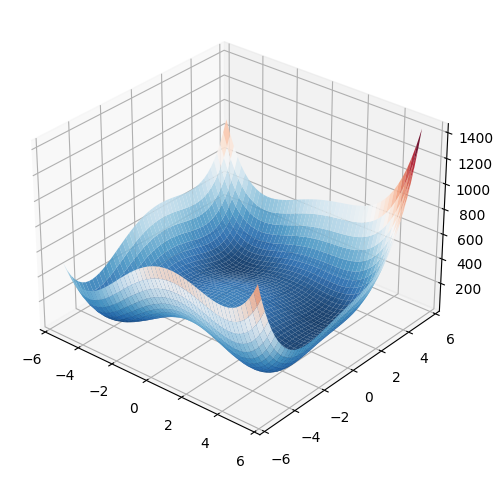

In [7]:
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
Z = f([X,Y])  # Utilisation de la version f(X)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30, -50)
ax.plot_surface(X,Y, Z, rstride=1, cstride=1, edgecolor='none',alpha=0.9,cmap=cmap_reversed)

plt.tight_layout()
plt.show()

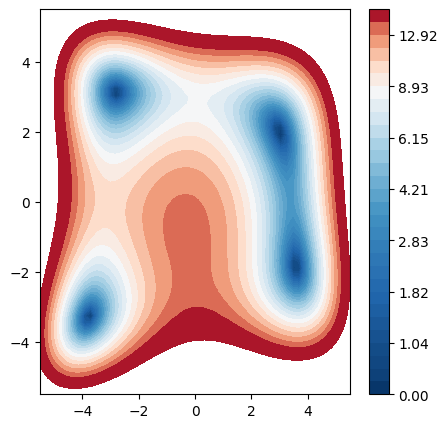

In [8]:
##vue du dessus pour augmenter la lisbilité
##passage à la racine carrée pour les même raisons
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
Z = f([X,Y])
levels = list(1.7 ** np.linspace(0, 10, 30) - 1.)+[300]
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(levels), cmap=cmap_reversed)
plt.colorbar()
plt.show()

**Question 2**


Calculer théoriquement $\nabla f(x,y) = (\frac{\partial f}{\partial x}(x,y), \frac{\partial f}{\partial y}(x,y))$. L'implémenter dans `f_grad(x,y)`.

f = x^4 + 2x^2(y) - 22x^2 - 22 y + 121 + y^2
    + x^2 + 2xy^2 - 14x - 14y^2 + y^2 + 49

$\frac{\partial f}{\partial x} = \frac{(\partial (x**2 + C) + (x + C')**2)}{\partial x}$

C  = y - 11

C' = y**2 - 7

In [9]:
def f_grad1(x,y):
    df_x = 4*x*(x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_y = 4*y*(x + y**2 - 7) + 2 * (x**2 + y - 11)
    
    return (np.array([df_x, df_y]))

def f_grad(x,y):
    cx1 = y - 11
    cx2 = y**2 - 7
    cy1 = x**2 - 11
    cy2 = x - 7
    df_x = 4*x**3 + 4*x*cx1 + 2*x + 2*cx2
    df_y = 2*y + 2*cy1 + 4*y**3 + 4*y*cy2
    
    return np.array([df_x, df_y])

x,y = 1,1
f_grad(x,y), f_grad1(x,y)

(array([-46, -38]), array([-46, -38]))

**Question 3**

Écrire une fonction `gradDes2EZ_q3(x0,y0,k,d)` implémentant la descente de gradient pour cet exemple. Cette fonction retourne la liste des points visités lors de la descente de gradient

In [10]:
def gradDes2EZ_q3(x0,y0,k=10,d=.01):
    
    """ Descente de gradient pour la fonction x,y ->  (x^2 +y -11)^2 + (x+y^2 -7)^2

    Parameters:
    x0,y0 (float): points initiaux
    k (int): nombre d'itérations
    d (float): pas

    Returns:
    liste_X,liste_Y: points visités lors de la descente de gradient
   """
    liste_X = [x0]
    liste_Y = [y0]

    for i in range(0, k):
        g = f_grad(x0, y0)
        x0 -= g[0] * d
        y0 -= g[1] * d
        liste_X.append(x0)
        liste_Y.append(y0)
        
    return [liste_X, liste_Y]

x0,y0=0.5, -4 
gradDes2EZ_q3(x0,y0)

[[0.5,
  0.605,
  0.947634695,
  1.4443555419253844,
  2.106590234553037,
  2.845205942971301,
  3.399704929613084,
  3.574879918337229,
  3.5807942734679368,
  3.5816367472013826,
  3.582427227331109],
 [-4,
  -2.185,
  -2.070276235,
  -1.9731018871851784,
  -1.886575441219658,
  -1.8182843739706784,
  -1.7855450862166504,
  -1.790428682806361,
  -1.8059343426251486,
  -1.8176569626731067,
  -1.826190140651486]]

**Question 4**

Illustrer l'algorithme en traçant les points visités sur la vue du dessus

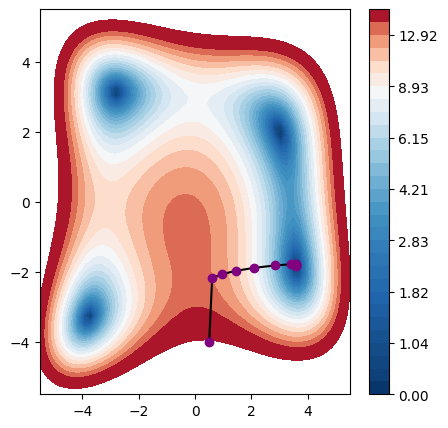

In [11]:
X,Y = np.meshgrid(np.linspace(-5.5, 5.5, 50),np.linspace(-5.5, 5.5, 50))
def graphique_descente_2EZ(x0,y0,k=10,d=.01):
    
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.figure(figsize=(5, 5))
    plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(levels), cmap=cmap_reversed)
    plt.colorbar()
    xs=gradDes2EZ_q3(x0,y0,k,d)
    x, y = np.array(xs)
    plt.plot(x, y, 'k')
    plt.plot(x, y, 'o', color='purple')
    plt.show()
    
x0,y0=0.5, -4 

graphique_descente_2EZ(x0,y0)

**Question 5**

Faire varier les paramètres à l'aide de widgets. Que remarquez-vous ?

In [12]:
from ipywidgets import interact, fixed
interact(graphique_descente_2EZ,x0=(-4,4,.01),y0=(-4,4,.01), k=(0, 50, 1), d=(0., .5, 0.005))

interactive(children=(FloatSlider(value=0.0, description='x0', max=4.0, min=-4.0, step=0.01), FloatSlider(valu…

<function __main__.graphique_descente_2EZ(x0, y0, k=10, d=0.01)>

**Question 6** Une méthode d'arret classique est de stopper si on a atteint le nombre maximal d'itérations autorisé, ou bien que le gradient est suffisamment proche de zéro (typiquement $|\nabla f | < 10^{-5}$ i.e. la somme des deux dérivées partielles est inférieure à $ \varepsilon = 10^{-5}$). 

Implémenter ce critère dans `gradDes2EZ_q6`. Faites en sorte d'afficher le nombre de pas executés.

In [13]:
def gradDes2EZ_q6(x0, y0, k = 10, d = .01, eps = 1e-5):
    liste_X = [x0]
    liste_Y = [y0]
    i=0

    while i in range(0, k) and f([x0, y0]) >= eps:
        g = f_grad(x0, y0)
        x0 -= g[0] * d
        y0 -= g[1] * d
        liste_X.append(x0)
        liste_Y.append(y0)
        i+=1

    return [liste_X, liste_Y, i]


x0, y0 = 0.5, -4 
z = gradDes2EZ_q6(x0, y0, 100)
print("nombre de pas executes:",z[2])

nombre de pas executes: 20


## Exercice 2 : Algorithme générique ($\mathbb{R}^2 \to \mathbb{R}$)


On va maintenant implémenter un version plus générique :

<tt>gradDes2(f,X0,f_grad=f_gradapprox(f),k=10,d=.01) </tt>


avec 

- $f :\mathbb{R}^2 \to \mathbb{R} $ une fonction quelconque.
- $X_0 \in \mathbb{R}^2$ un vecteur d'initialisation
- <tt>f_grad</tt> une fonction $\mathbb{R}^2 \to \mathbb{R} $ faisant office de gradient pour $f$ (par défaut, si on ne sait pas calculer le gradient on renvoie une approximation définie par <tt>f_gradapprox</tt> qui utilise :
$\nabla f(x)  \approx (\frac{f(x+\varepsilon,y)-f(x-\varepsilon,y)}{2\varepsilon},\frac{f(x,y+\varepsilon)-f(x,y-\varepsilon)}{2\varepsilon})$
- $k$ le nombre maximum d'itération
- $d$ le pas (supposé constant)

**Question 1** 

Ecrire la fonction `f_gradapprox` qui calcule une approximation de $\nabla f(x)$ et `gradDes2` qui fait la descente de gradient sur n'importe quelle fonction f.

In [14]:
def f(X):# from matlab website
    x, y = X  
    z = 3 * (x-1)**2 * np.exp(-(y+1)**2-x**2) - 1/3 * (np.exp(-(x+1)**2-x**2)) + (10*x**3-2*x+10*y**5)*np.exp(-x**2-y**2)
    
    return (z)

def f_gradapprox(f,X,eps=1.e-5):
    return [((f([X[0]+eps,X[1]])-f([X[0]-eps,X[1]]))/(2*eps)),((f([X[0],X[1]+eps])-f([X[0],X[1]-eps]))/(2*eps))]

def gradDes2(f,X0,f_grad=lambda x : f_gradapprox(f,x),k=10,d=.01):
    liste_X = [X0[0]]
    liste_Y = [X0[1]]

    for i in range(0, k):
        g = f_grad(X0)
        X0[0] -= (g[0]*d)
        X0[1] -= (g[1]*d)
        liste_X.append(X0[0])
        liste_Y.append(X0[1])
    return [liste_X, liste_Y] 

eps=1e-5
gradDes2(f,np.array([2,9]))

[[2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

**Question 2** 

Illustrer cet algorithme en écrivant la méthode `graphique_descente_2`

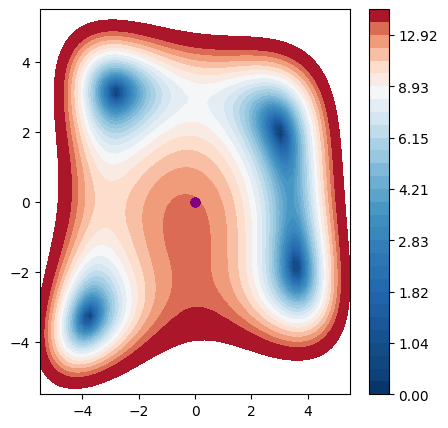

In [15]:
def graphique_descente_2(f,X0,f_grad=lambda x : f_gradapprox(f,x),k=10,d=.1):
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.figure(figsize=(5, 5))
    plt.contourf(X, Y, np.sqrt(Z), levels=np.sqrt(levels), cmap=cmap_reversed)
    plt.colorbar()
    xs=gradDes2(f,X0,f_grad=lambda x : f_gradapprox(f,x),k=10,d=.01)
    x, y = np.array(xs)
    plt.plot(x, y, 'k')
    plt.plot(x, y, 'o', color='purple')
    plt.show()

    
graphique_descente_2(f,np.array([0,0]))

**Question 3** Observer l'effet de la modification des paramètres.

In [16]:
interact(graphique_descente_2,f=fixed(f), X0=fixed([0,0]),f_grad=fixed(lambda x : f_gradapprox(f,x)), k=(0, 50, 1), d=(0., .5, 0.005))

interactive(children=(IntSlider(value=10, description='k', max=50), FloatSlider(value=0.1, description='d', ma…

<function __main__.graphique_descente_2(f, X0, f_grad=<function <lambda> at 0x7f912e049360>, k=10, d=0.1)>

**Question 4** Que se passe-il si on applique la méthode du gradient à la fonction $(x,y) \mapsto -x^2 -y^2$ ?

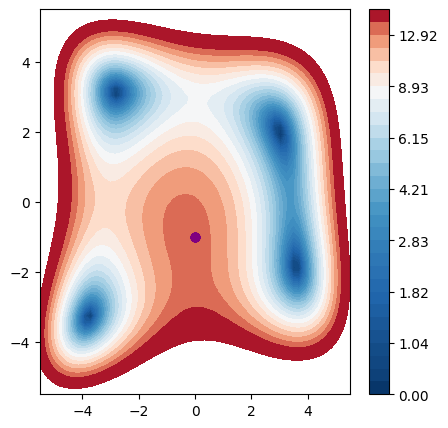

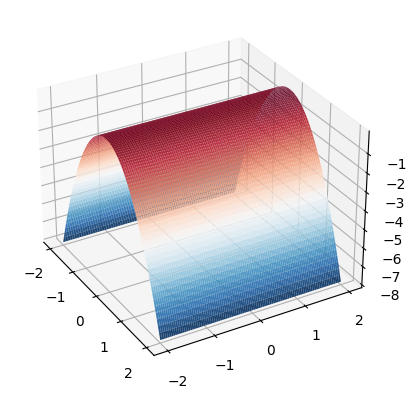

In [17]:
def f(X):
    return -X[0]**2-X[0]**2
graphique_descente_2(f,np.array([0,-1]))

########### Vue 3D ###########
n = 100
VX = np.linspace(-2.0, 2.0, n)
VY = np.linspace(-2.0, 2.0, n)
X,Y = np.meshgrid(VX, VY)


Z = f([X,Y])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30, -30)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none',alpha=0.9,cmap=cmap_reversed)


plt.show()


**Question 5** La méthode du gradient n'est pas garantie de converger. Un précaution supplémentaire consiste à ajouter un critère de sortie si le gradient commence à exploser, par exemple en dépassant $10 000$ fois la norme du gradient d'origine. Rajouter cette précaution en définissant `gradDes2_q5`. Afficher le nombre de pas avant l'arrêt de l'algorithme.

In [18]:
def gradDes2_q5(f, X0,f_grad=lambda x : f_gradapprox(f,x),k=10,d=.01,eps = 1e-5):
    liste_X = [X0[0]]
    liste_Y = [X0[1]]
    i=0
    
    while i in range(0, k) and (f(X0) <= eps):
        grad=f_grad(X0)
        X0[0]-=(grad[0]*d)
        X0[1]-=(grad[1]*d)
        liste_X.append(X0[0])
        liste_Y.append(X0[1])
        i+=1
    return [liste_X, liste_Y, i]

def f(X):
    x,y=X  
    z = -x**2-y**2
    return z

eps=1e-5
x = gradDes2_q5(f,np.array([0,0]), k = 100, d=0.2)
print("nombre de pas executes :",x[2])

nombre de pas executes : 100



### Extensions suggérées :


#### Choix du pas  adaptatif via une recherche linéaire 

Une méthode possible pour choisir le pas est la méthode du _backtracking_:

supposons que l'on souahaite optimiser une fonction $f$.

À l'étape $k$ le point courant est $a_k$, et la direction donnée par le gradient est $\nabla f(a_k)$

On choisit alors le pas $\delta_{k+1}$ en utilisant l'algorithme suivant :


$\delta_{k+1} = \delta_0$


_Tant que_ $f(a_k - \delta_{k+1} \nabla f(a_k)) >  f(a_k)$



$\delta_{k+1} \leftarrow \frac{\delta_{k+1} }{2}$



On peut rafiner cette approche avec par exemple la condition dite d’Armijo

#### Gradient coordonné
L'idée est de ne pas calculer à chaque étape le gradient complet, mais seulement pour une coordonnée (choisie au hasard, ou selon un ordre prédéterminé)


<u>_Methode du gradient coordonné_</u>


_Inputs_   $f=(f_1,...,f_n), \grad f=(\grad f_1,...,\grad f_n), v_0 \in R^d$

 
Pour $k = 0, 1, ...$

1. Choisir une coordonnée $x_i$
2. Definir le nouveau point comme : $v_{k+1} = v_k − \alpha_k \frac{\partial f(v_k)}{\partial x_i} $

Fin

Implémenter cette méthode et la comparer avec la méthode standard avec des exemples.


In [57]:
import numpy as np

def f(X):
    x, y = X

    return (x ** 2 + y ** 2)

def f_gradapprox(f, X, eps = 1.e-5):
    return [((f([X[0]+eps, X[1]]) - f([X[0] -eps,X[1]]))/(2*eps)),((f([X[0],X[1]+eps])-f([X[0],X[1]-eps]))/(2*eps))]

def gradDesAdap(f,X0,f_grad=lambda x : f_gradapprox(f,x),k=10,d=10,eps = 1e-5):
    liste_X = [X0[0]]
    liste_Y = [X0[1]]
    d0      = np.array(d, dtype=float)
    i       = 0
    X0 = np.array(X0, dtype=float)

    while (i < k):
        delta = d0
        g = np.array(f_grad(X0), dtype=float)
        while(f(X0 - g * delta) > f(X0)):
            delta /= 2
            print("delta : ", delta," f(X0 - g * delta) : ", f(X0 - g * delta)," f(X0) : ", f(X0))
        g = np.array(f_grad(X0), dtype=float)
        X0 -= g * delta
        liste_X.append(X0[0])
        liste_Y.append(X0[1])
        i += 1
    return [liste_X, liste_Y] 

print(gradDesAdap(f,[50,50]))

delta :  5.0  f(X0 - g * delta) :  405000.000183354  f(X0) :  5000.0
delta :  2.5  f(X0 - g * delta) :  80000.00004074533  f(X0) :  5000.0
delta :  1.25  f(X0 - g * delta) :  11250.000007639752  f(X0) :  5000.0
delta :  0.625  f(X0 - g * delta) :  312.50000063664595  f(X0) :  5000.0
[[50, -12.500000012732919, 3.125000001108452, -0.7812500002424669, 0.19531250005362943, -0.048828125013455764, 0.012207031253369742, -0.0030517578133417173, 0.000762939453335301, -0.00019073486333383446, 4.768371583345848e-05], [50, -12.500000012732919, 3.125000001108452, -0.7812500002424669, 0.19531250005362943, -0.048828125013455764, 0.012207031253369742, -0.0030517578133417173, 0.000762939453335301, -0.00019073486333383446, 4.768371583345848e-05]]
